<a href="https://colab.research.google.com/github/lugastyan/ML-portofolio/blob/main/Figuring_Out_Which_Customer_May_Leave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

* customerID - ID Pelanggan

* gender - Apakah pelanggan tersebut laki-laki atau perempuan

* SeniorCitizen - Apakah pelanggan tersebut seorang warga senior atau tidak (1, 0)

* Partner - Apakah pelanggan tersebut memiliki pasangan atau tidak (Ya, Tidak)

* Dependents - Apakah pelanggan tersebut memiliki tanggungan atau tidak (Ya, Tidak)

* tenure - Jumlah bulan pelanggan tinggal bersama perusahaan

* PhoneService - Apakah pelanggan tersebut memiliki layanan telepon atau tidak (Ya, Tidak)
* MultipleLines - Apakah pelanggan tersebut memiliki lebih dari satu saluran atau tidak (Ya, Tidak, Tidak ada layanan telepon)

* InternetService - Penyedia layanan internet pelanggan (DSL, Serat optik, Tidak ada)

* OnlineSecurity - Apakah pelanggan tersebut memiliki keamanan online atau tidak (Ya, Tidak, Tidak ada layanan internet)

* OnlineBackup - Apakah pelanggan tersebut memiliki cadangan online atau tidak (Ya, Tidak, Tidak ada layanan internet)

* DeviceProtection - Apakah pelanggan tersebut memiliki perlindungan perangkat atau tidak (Ya, Tidak, Tidak ada layanan internet)

* TechSupport - Apakah pelanggan tersebut memiliki dukungan teknis atau tidak (Ya, Tidak, Tidak ada layanan internet)

* StreamingTV - Apakah pelanggan tersebut memiliki layanan TV streaming atau tidak (Ya, Tidak, Tidak ada layanan internet)

* StreamingMovies - Apakah pelanggan tersebut memiliki layanan streaming film atau tidak (Ya, Tidak, Tidak ada layanan internet)

* Contract - Istilah kontrak pelanggan (Bulanan, Satu tahun, Dua tahun)

* PaperlessBilling - Apakah pelanggan tersebut memiliki tagihan tanpa kertas atau tidak (Ya, Tidak)

* PaymentMethod - Metode pembayaran pelanggan (Cek elektronik, Cek dikirim, Transfer bank (otomatis), Kartu kredit (otomatis))

* MonthlyCharges - Jumlah yang dibebankan kepada pelanggan setiap bulannya

* TotalCharges - Jumlah total yang dibebankan kepada pelanggan

* Churn - Apakah pelanggan berhenti berlangganan atau tidak (Ya atau Tidak)


In [ ]:
import pandas as pd
file_name = 'https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/WA_Fn-UseC_-Telco-Customer-Churn.csv'
churn_df = pd.read_csv(file_name)
churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
len(churn_df)

7043

In [ ]:
unique_values_list = []

for column in churn_df.columns:
    unique_values = churn_df[column].unique()
    unique_values_list.append({'Column Name': column, 'Unique Values': unique_values})

pd.DataFrame(unique_values_list)

,Column Name,Unique Values
0,customerID,"[7590-VHVEG, 5575-GNVDE, 3668-QPYBK, 7795-CFOC..."
1,gender,"[Female, Male]"
2,SeniorCitizen,"[0, 1]"
3,Partner,"[Yes, No]"
4,Dependents,"[No, Yes]"
5,tenure,"[1, 34, 2, 45, 8, 22, 10, 28, 62, 13, 16, 58, ..."
6,PhoneService,"[No, Yes]"
7,MultipleLines,"[No phone service, No, Yes]"
8,InternetService,"[DSL, Fiber optic, No]"
9,OnlineSecurity,"[No, Yes, No internet service]"


In [ ]:
len(churn_df.MonthlyCharges.unique())

1585

In [ ]:
churn_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [ ]:
# Summarize our dataset
print('Row     :', churn_df.shape[0])
print('Columns :', churn_df.shape[1])
print('\nFeatures : \n', churn_df.columns.tolist())
print('\nMissing values : ', churn_df.isnull().sum().values.sum())
print('\nUnique values :  \n', churn_df.nunique())

Row     : 7043
Columns : 21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :  0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [ ]:
churn_df['Churn'].value_counts(sort=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

# Exploratory Data Analysis

In [ ]:
churn_df_copy = churn_df.copy()

In [ ]:
churn_df_copy.drop(['customerID','MonthlyCharges','TotalCharges','tenure'], axis = 1, inplace=True)


In [ ]:
# create new dataset called summary so we can summarize out churn data
summary = pd.concat([pd.crosstab(churn_df_copy[x], churn_df_copy.Churn) for x in churn_df_copy.columns[:-1]], keys=churn_df_copy.columns[:-1])

In [ ]:
summary

Churn                                         No   Yes
gender           Female                     2549   939
                 Male                       2625   930
SeniorCitizen    0                          4508  1393
                 1                           666   476
Partner          No                         2441  1200
                 Yes                        2733   669
Dependents       No                         3390  1543
                 Yes                        1784   326
PhoneService     No                          512   170
                 Yes                        4662  1699
MultipleLines    No                         2541   849
                 No phone service            512   170
                 Yes                        2121   850
InternetService  DSL                        1962   459
                 Fiber optic                1799  1297
                 No                         1413   113
OnlineSecurity   No                         2037  1461
                 No internet service        1413   113
                 Yes                        1724   295
OnlineBackup     No                         1855  1233
                 No internet service        1413   113
                 Yes                        1906   523
DeviceProtection No                         1884  1211
                 No internet service        1413   113
                 Yes                        1877   545
TechSupport      No                         2027  1446
                 No internet service        1413   113
                 Yes                        1734   310
StreamingTV      No                         1868   942
                 No internet service        1413   113
                 Yes                        1893   814
StreamingMovies  No                         1847   938
                 No internet service        1413   113
                 Yes                        1914   818
Contract         Month-to-month             2220  1655
                 One year                   1307   166
                 Two year                   1647    48
PaperlessBilling No                         2403   469
                 Yes                        2771  1400
PaymentMethod    Bank transfer (automatic)  1286   258
                 Credit card (automatic)    1290   232
                 Electronic check           1294  1071
                 Mailed check               1304   308

In [ ]:
# Lets makea percentage column

summary['Churn_Percentage'] = summary['Yes'] / (summary['No'] + summary['Yes'])
summary

Churn                                         No   Yes  Churn_Percentage
gender           Female                     2549   939          0.269209
                 Male                       2625   930          0.261603
SeniorCitizen    0                          4508  1393          0.236062
                 1                           666   476          0.416813
Partner          No                         2441  1200          0.329580
                 Yes                        2733   669          0.196649
Dependents       No                         3390  1543          0.312791
                 Yes                        1784   326          0.154502
PhoneService     No                          512   170          0.249267
                 Yes                        4662  1699          0.267096
MultipleLines    No                         2541   849          0.250442
                 No phone service            512   170          0.249267
                 Yes                        2121   850          0.286099
InternetService  DSL                        1962   459          0.189591
                 Fiber optic                1799  1297          0.418928
                 No                         1413   113          0.074050
OnlineSecurity   No                         2037  1461          0.417667
                 No internet service        1413   113          0.074050
                 Yes                        1724   295          0.146112
OnlineBackup     No                         1855  1233          0.399288
                 No internet service        1413   113          0.074050
                 Yes                        1906   523          0.215315
DeviceProtection No                         1884  1211          0.391276
                 No internet service        1413   113          0.074050
                 Yes                        1877   545          0.225021
TechSupport      No                         2027  1446          0.416355
                 No internet service        1413   113          0.074050
                 Yes                        1734   310          0.151663
StreamingTV      No                         1868   942          0.335231
                 No internet service        1413   113          0.074050
                 Yes                        1893   814          0.300702
StreamingMovies  No                         1847   938          0.336804
                 No internet service        1413   113          0.074050
                 Yes                        1914   818          0.299414
Contract         Month-to-month             2220  1655          0.427097
                 One year                   1307   166          0.112695
                 Two year                   1647    48          0.028319
PaperlessBilling No                         2403   469          0.163301
                 Yes                        2771  1400          0.335651
PaymentMethod    Bank transfer (automatic)  1286   258          0.167098
                 Credit card (automatic)    1290   232          0.152431
                 Electronic check           1294  1071          0.452854
                 Mailed check               1304   308          0.191067

# Visualizations EDA

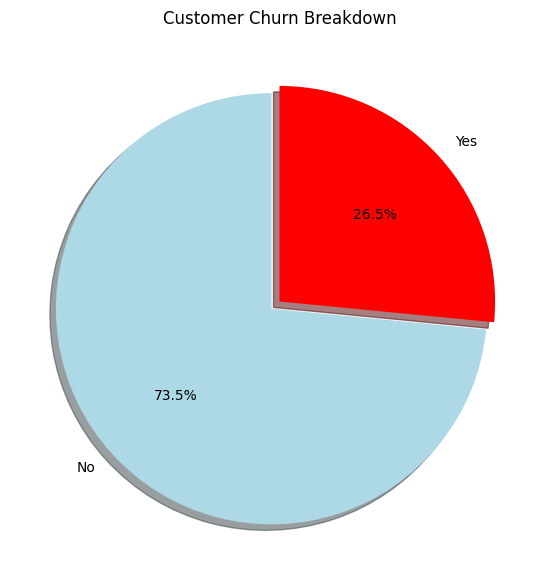

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

# Data to plot
labels = churn_df['Churn'].value_counts(sort = True).index
sizes = churn_df['Churn'].value_counts(sort=True)

colors = ['lightblue','red']
explode = (0.05,0)

rcParams['figure.figsize'] = 7,7

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Customer Churn Breakdown')
plt.show()

In [ ]:
labels

Index(['No', 'Yes'], dtype='object')

<ipython-input-16-4fe420ef34d6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Churn', y='MonthlyCharges', data = churn_df, kind ='violin', palette = 'Pastel1')


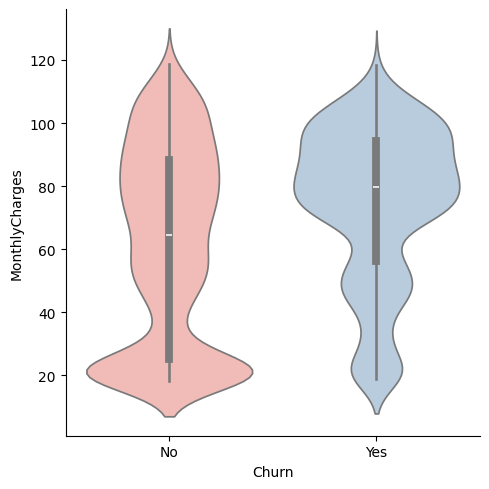

In [ ]:
# Create a volin plot showing how monthy charge relate to churn
# We see that churned customer tend to be higher paying customer
g = sns.catplot(x='Churn', y='MonthlyCharges', data = churn_df, kind ='violin', palette = 'Pastel1')

<ipython-input-17-b4d2c13157f1>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x='Churn', y= 'tenure', data = churn_df, kind= 'violin', palette = 'Pastel1')


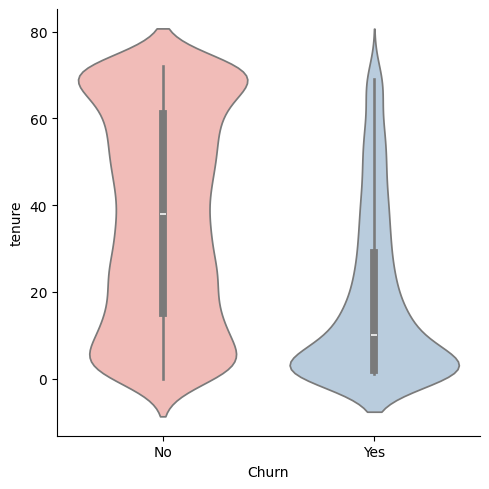

In [ ]:
g = sns.catplot(x='Churn', y= 'tenure', data = churn_df, kind= 'violin', palette = 'Pastel1')

<ipython-input-18-e0d006fbc0f5>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


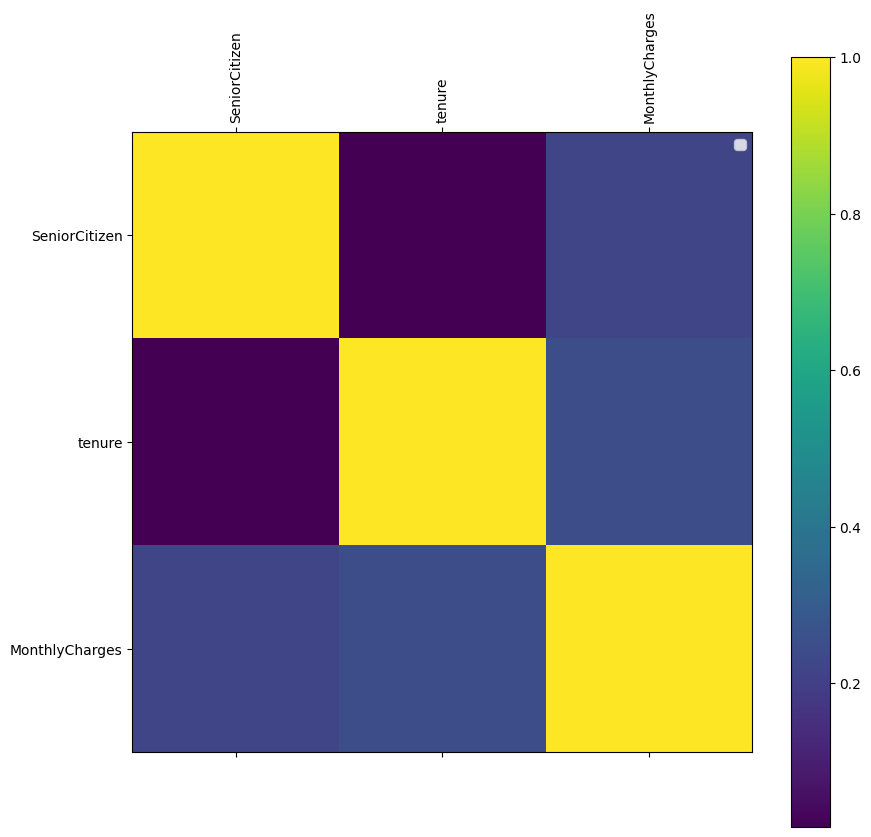

In [ ]:
import matplotlib.pyplot as plt

def plot_corr(df, size=10):

  corr = df.corr()
  fig, ax = plt.subplots(figsize=(size, size))
  ax.legend()
  cax = ax.matshow(corr)
  fig.colorbar(cax)
  plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_corr(churn_df)

# Prepare Data for Machine Learning Classifier

In [ ]:
# Check for empty field, Note : ' ' is not Null but a spaced caracter
len(churn_df[churn_df['TotalCharges'] == ' '])

11

In [ ]:
# Drop the missing data
churn_df = churn_df[churn_df['TotalCharges'] != ' ']

In [ ]:
# Check again
len(churn_df[churn_df['TotalCharges'] == ' '])

0

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Customerid col
Id_col = ['customerID']

# Target columns
target_col = ['Churn']

# Categorical column
cat_cols = churn_df.nunique()[churn_df.nunique() < 6].keys().tolist()

# Numerical columns
num_cols = [x for x in churn_df.columns if x not in cat_cols + target_col + target_col + Id_col]

# Binary columns with 2 values
bin_cols = churn_df.nunique()[churn_df.nunique() == 2].keys().tolist()

# Columns motethan 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

# Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
  churn_df[i] = le.fit_transform(churn_df[i])

# Duplicating columns for multi value columns
churn_df = pd.get_dummies(data = churn_df, columns = multi_cols)
churn_df.head()



<ipython-input-22-afd7ba8bac1f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df[i] = le.fit_transform(churn_df[i])
<ipython-input-22-afd7ba8bac1f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df[i] = le.fit_transform(churn_df[i])
<ipython-input-22-afd7ba8bac1f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,1,0,0,0,0,1,0


In [ ]:
len(churn_df.columns)

42

In [ ]:
# Scaling Numerical columns
std = StandardScaler()

# Scale data
scaled = std.fit_transform(churn_df[num_cols])
scaled = pd.DataFrame(scaled, columns=num_cols)

# droping original values merging scaled values for numerical columns
df_telcom_og = churn_df.copy()
churn_df = churn_df.merge(scaled, left_index=True, right_index=True, how='left')

churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure_x,PhoneService,PaperlessBilling,MonthlyCharges_x,TotalCharges_x,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_y,MonthlyCharges_y,TotalCharges_y
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.5,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [ ]:
churn_df.drop(['customerID'], axis=1, inplace=True)
churn_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure_x,PhoneService,PaperlessBilling,MonthlyCharges_x,TotalCharges_x,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_y,MonthlyCharges_y,TotalCharges_y
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,0,0,1,0,-1.280248,-1.161694,-0.994194
1,1,0,0,0,34,1,0,56.95,1889.5,0,...,0,1,0,0,0,0,1,0.064303,-0.260878,-0.173740
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,0,0,0,1,-1.239504,-0.363923,-0.959649
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,1,0,0,0,0.512486,-0.747850,-0.195248
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,0,0,1,0,-1.239504,0.196178,-0.940457


In [ ]:
# Check NaN values
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure_x,PhoneService,PaperlessBilling,MonthlyCharges_x,TotalCharges_x,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_y,MonthlyCharges_y,TotalCharges_y
7032,1,1,0,0,1,1,1,75.75,75.75,1,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7033,1,0,0,0,38,1,1,69.50,2625.25,0,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7034,0,0,0,0,67,1,1,102.95,6886.25,1,...,1,0,0,0,1,0,0,NaN,NaN,NaN
7035,1,0,0,0,19,1,1,78.70,1495.1,0,...,1,0,0,1,0,0,0,NaN,NaN,NaN
7036,0,0,0,0,12,0,0,60.65,743.3,0,...,0,1,0,0,0,1,0,NaN,NaN,NaN
7037,0,0,0,0,72,1,1,21.15,1419.4,0,...,0,0,1,1,0,0,0,NaN,NaN,NaN
7038,1,0,1,1,24,1,1,84.80,1990.5,0,...,0,1,0,0,0,0,1,NaN,NaN,NaN
7039,0,0,1,1,72,1,1,103.20,7362.9,0,...,0,1,0,0,1,0,0,NaN,NaN,NaN
7040,0,0,1,1,11,0,1,29.60,346.45,0,...,1,0,0,0,0,1,0,NaN,NaN,NaN
7041,1,1,1,0,4,1,1,74.40,306.6,1,...,1,0,0,0,0,0,1,NaN,NaN,NaN


In [ ]:
# Drop NaN values
churn_df = churn_df.dropna()

In [ ]:
# Check NaN values again
churn_df[churn_df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure_x,PhoneService,PaperlessBilling,MonthlyCharges_x,TotalCharges_x,Churn,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_y,MonthlyCharges_y,TotalCharges_y


# Modeling

In [ ]:
from sklearn.model_selection import train_test_split

# emove label value fromour training data
X = churn_df.drop(['Churn'], axis = 1).values

# Assigned those
y = churn_df['Churn'].values

# Split into 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4914, 43), (2107, 43), (4914,), (2107,))

In [ ]:
df_train = pd.DataFrame(X_train)
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,1,1,1,0,1,1,1,80.3,80.3,0,...,1,0,0,0,0,1,0,-1.19876,-1.529001,-0.982657
1,0,0,0,0,10,0,1,29.6,299.05,0,...,0,0,1,0,0,0,1,-0.913552,-1.170004,-0.875426
2,0,0,1,1,45,1,1,54.15,2319.8,1,...,0,1,0,0,1,0,0,1.612573,-1.316262,-0.218807
3,0,0,1,0,49,0,1,56.3,2780.6,0,...,0,1,0,0,1,0,0,-0.343137,-0.014899,-0.319707
4,1,1,0,0,16,1,0,69.65,1043.3,1,...,1,0,0,0,0,1,0,-0.465369,1.063754,-0.111621


# Fit a Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
score = model.score(X_test, y_test)

print('Accuracy = ' + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


Accuracy = 0.81015662078785
[[1382  164]
 [ 236  325]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1546
           1       0.66      0.58      0.62       561

    accuracy                           0.81      2107
   macro avg       0.76      0.74      0.75      2107
weighted avg       0.80      0.81      0.81      2107



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Lets see what features matteredmost i.e feature importance
# We sort on the co efficients with the largest weights as those impact the resulting output the most

coef = model.coef_[0]
coef = [abs(number) for number in coef]
print(coef)

[0.09021567754946946, 0.16377776145684667, 0.044177760374928134, 0.16822800883874753, 0.05306797206124473, 0.2646736265834951, 0.41038015002056477, 0.002879216597523352, 0.0002723521548206181, 0.2784211674086482, 0.10907244382999091, 0.013747540822161935, 0.3749517363158722, 0.3354718641838023, 0.11612131062892742, 0.21213983920106086, 0.11612131062892742, 0.2516197113331808, 0.08119550273111042, 0.11612131062892742, 0.12067537485939962, 0.019971860618368975, 0.11612131062892742, 0.05945173274522179, 0.2325072437394311, 0.11612131062892742, 0.27198711586749114, 0.11138810095479654, 0.11612131062892742, 0.07190822882586823, 0.1600012794542102, 0.11612131062892742, 0.12052140732523182, 0.47411123884584727, 0.20112875779775377, 0.4285836638104607, 0.12997601118967023, 0.11777985876595472, 0.3227372835270588, 0.23058259631618322, 0.057167175476302595, 0.016043186741942814, 0.11906275606888288]


In [ ]:
# Finding and deleting the label column (churn column / y)
cols = list(churn_df.columns)
cols.index('Churn')

9

In [ ]:
# Delete 9 in index
del cols[9]
cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure_x',
 'PhoneService',
 'PaperlessBilling',
 'MonthlyCharges_x',
 'TotalCharges_x',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'InternetService_DSL',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'DeviceProtection_No',
 'DeviceProtection_No internet service',
 'DeviceProtection_Yes',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'PaymentMethod_Electronic check',
 'PaymentMetho

In [ ]:
# shorting on feature importance
sorted_index = sorted(range(len(coef)), key=lambda k:coef[k], reverse = True)
for idx in sorted_index :
  print(cols[idx])


Contract_Month-to-month
Contract_Two year
PaperlessBilling
InternetService_DSL
InternetService_Fiber optic
PaymentMethod_Electronic check
MultipleLines_No
TechSupport_Yes
PhoneService
OnlineSecurity_Yes
TechSupport_No
PaymentMethod_Mailed check
OnlineSecurity_No
Contract_One year
Dependents
SeniorCitizen
StreamingMovies_No
PaymentMethod_Bank transfer (automatic)
OnlineBackup_Yes
StreamingMovies_Yes
TotalCharges_y
PaymentMethod_Credit card (automatic)
InternetService_No
OnlineSecurity_No internet service
OnlineBackup_No internet service
DeviceProtection_No internet service
TechSupport_No internet service
StreamingTV_No internet service
StreamingMovies_No internet service
StreamingTV_No
MultipleLines_No phone service
gender
OnlineBackup_No
StreamingTV_Yes
DeviceProtection_Yes
tenure_y
tenure_x
Partner
DeviceProtection_No
MonthlyCharges_y
MultipleLines_Yes
MonthlyCharges_x
TotalCharges_x


# Try Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

predictions = model_rf.predict(X_test)
score = model_rf.score(X_test, y_test)

print('Accuracy : ' + str(score))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy : 0.8039867109634552
[[1389  157]
 [ 256  305]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1546
           1       0.66      0.54      0.60       561

    accuracy                           0.80      2107
   macro avg       0.75      0.72      0.73      2107
weighted avg       0.80      0.80      0.80      2107

